# 数据预处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('train_data.csv')

In [3]:
dataset.shape

(929088, 9)

In [4]:
dataset.head(10)

,date,user_id,power_consumption,low_temp,high_temp,kind,wind,level,holiday
0,2015-01-01,1,1135,8,-4,晴,西南风,小于3级,NaN
1,2015-01-02,1,570,13,0,多云转晴,东南风,小于3级,2.0
2,2015-01-03,1,3418,16,3,多云,南风,小于3级,2.0
3,2015-01-04,1,3968,15,4,晴转阴,东风,3-4级,1.0
4,2015-01-05,1,3986,10,2,小雨转雨夹雪,西北风,4-5级转3-4级,2.0
5,2015-01-06,1,4082,7,-1,阴转多云,北风,小于3级,1.0
6,2015-01-07,1,4172,7,-2,晴,西北风,小于3级,0.0
7,2015-01-08,1,4022,12,-1,晴,北风,小于3级,0.0
8,2015-01-09,1,4025,14,1,晴转多云,西南风,小于3级,1.0
9,2015-01-10,1,4047,14,1,晴,西南风,小于3级,0.0


检查缺失值

In [5]:
dataset.isna().sum()

date                     0
user_id                  0
power_consumption        0
low_temp                 0
high_temp                0
kind                     0
wind                     0
level                10178
holiday               1454
dtype: int64

检查异常值

In [6]:
dataset.iloc[dataset.values=='?'].count()

date                 0
user_id              0
power_consumption    0
low_temp             0
high_temp            0
kind                 0
wind                 0
level                0
holiday              0
dtype: int64

对缺失值进行众数处理

In [7]:
dataset['level'] = dataset['level'].fillna(dataset['level'].mode().values[0])

In [8]:
dataset['holiday'] = dataset['holiday'].fillna(dataset['holiday'].mode().values[0])

缺失值填充完毕

In [9]:
dataset.isna().sum()

date                 0
user_id              0
power_consumption    0
low_temp             0
high_temp            0
kind                 0
wind                 0
level                0
holiday              0
dtype: int64

查找数据中的字符型特征

In [10]:
num_fea = list(dataset.select_dtypes(exclude=['object']).columns)
char_fea = list(filter(lambda x : x not in num_fea, list(dataset.columns)))
print(char_fea)

['date', 'kind', 'wind', 'level']


对字符类型特征'kind','wind','level'进行数值化

查看类别数目

In [11]:
for cate_fea in ['kind', 'wind', 'level']:
    print(cate_fea, ':', dataset[cate_fea].nunique())

kind : 103
wind : 11
level : 17


进行labelEncoder编码转换（编号）

In [12]:
from sklearn.preprocessing import LabelEncoder
# for fea in ['kind', 'wind', 'level']:
#     le = LabelEncoder()
#     le.fit(dataset[fea].astype(str).tolist() + dataset[fea].astype(str).tolist())
#     dataset[fea] = le.transform(dataset[fea].astype(str).tolist())
#     dataset[fea] = le.transform(dataset[fea].astype(str).tolist())

# def min_max_scaler(df, fea_list):
#     for fea in fea_list:
#         max_value = np.max(df[fea])
#         min_value = np.min(df[fea])
#         df[fea] = (df[fea] - min_value) / (max_value - min_value)
#     return df

# d = min_max_scaler(d, ['kind', 'wind', 'level'])
for fea in ['kind', 'wind', 'level']:
    le = LabelEncoder()
    le.fit(dataset[fea].astype(str).tolist() + dataset[fea].astype(str).tolist())
    dataset[fea] = le.transform(dataset[fea].astype(str).tolist())

In [13]:
dataset.head(10)

,date,user_id,power_consumption,low_temp,high_temp,kind,wind,level,holiday
0,2015-01-01,1,1135,8,-4,58,9,13,0.0
1,2015-01-02,1,570,13,0,25,2,13,2.0
2,2015-01-03,1,3418,16,3,14,5,13,2.0
3,2015-01-04,1,3968,15,4,62,3,2,1.0
4,2015-01-05,1,3986,10,2,54,8,7,2.0
5,2015-01-06,1,4082,7,-1,78,4,13,1.0
6,2015-01-07,1,4172,7,-2,58,8,13,0.0
7,2015-01-08,1,4022,12,-1,58,4,13,0.0
8,2015-01-09,1,4025,14,1,61,9,13,1.0
9,2015-01-10,1,4047,14,1,58,9,13,0.0


将预处理后的数据储存好

In [14]:
dataset.to_csv('full_train_data.csv')

# 可视化分析

In [15]:
dataset = pd.read_csv('full_train_data.csv', header=0)

In [16]:
dataset.head()

,date,user_id,power_consumption,low_temp,high_temp,kind,wind,level,holiday
0,2015/1/1,1,1135,8,-4,58,9,13,0
1,2015/1/2,1,570,13,0,25,2,13,2
2,2015/1/3,1,3418,16,3,14,5,13,2
3,2015/1/4,1,3968,15,4,62,3,2,1
4,2015/1/5,1,3986,10,2,54,8,7,2


Text(0, 0.5, 'user_id')

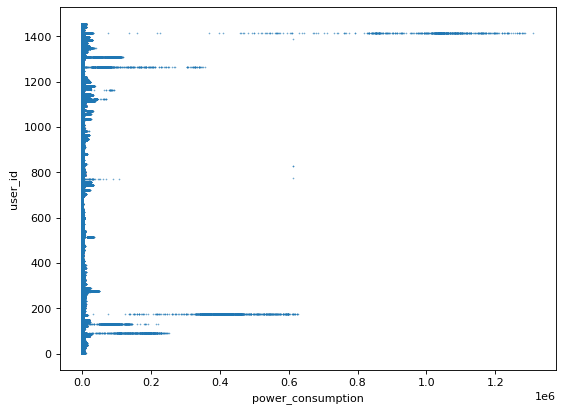

In [17]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset['power_consumption'], dataset['user_id'],s=0.1)
plt.xlabel('power_consumption')
plt.ylabel('user_id')

相关系数绘图

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data_1/data_1.csv', header=0)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

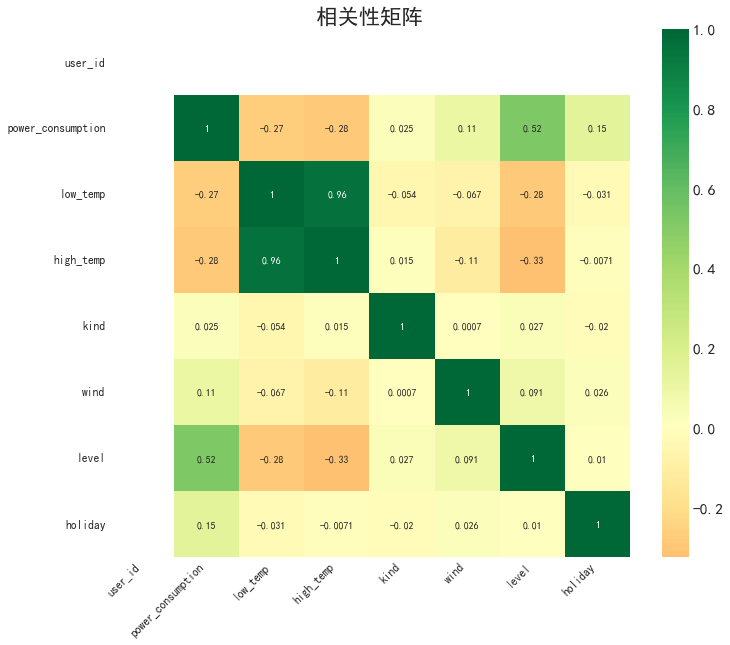

In [2]:
#确保正常显示中文+负号
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

#绘制图像
plt.figure(figsize=(12,10), dpi= 70)
sns.heatmap(data.corr() #需要输入的相关性矩阵
#             , xticklabels=coef.columns #横坐标标签
#             , yticklabels=coef.columns #纵坐标标签
            , cmap='RdYlGn' #使用的光谱，一般来说都会使用由浅至深，或两头颜色差距较大的光谱
         #   , cmap='winter' #不太适合做热力图的光谱
            , center=0 #填写数据的中值，注意观察此时的颜色条，大于0的是越来越靠近绿色，小于0的越来越靠近红色
         #   , center= -1 #填写数据中的最大值/最小值，则最大值/最小值是最浅或最深的颜色，数据离该极值越远，颜色越浅/颜色越深
            , annot=True
           )

#装饰图像
plt.title('相关性矩阵', fontsize=22)
plt.xticks(fontsize=12 #字体大小
           ,rotation=45 #字体是否进行旋转
           ,horizontalalignment='right' #刻度的相对位置
          )
plt.yticks(fontsize=12)
plt.show()